# Imports

In [1]:
import csv

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

# Heatmap

In [2]:
data = pd.read_csv('../data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data = data.drop(columns=['Name', 'Fare','Cabin']) #idk, guess, we shouldnt include cabins
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,S
1,2,1,1,female,38.0,1,0,PC 17599,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,S
3,4,1,1,female,35.0,1,0,113803,S
4,5,0,3,male,35.0,0,0,373450,S


In [4]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,S
1,2,1,1,female,38.0,1,0,PC 17599,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,S
3,4,1,1,female,35.0,1,0,113803,S
4,5,0,3,male,35.0,0,0,373450,S


In [5]:
data["Sex"] = [1 if i == "male" else 0 for i in data["Sex"]] 
data["Embarked"] = [0 if i == "S" else i for i in data["Embarked"]] 
data["Embarked"] = [1 if i == "C" else i for i in data["Embarked"]] 
data["Embarked"] = [2 if i == "Q" else i for i in data["Embarked"]] 

In [6]:
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Embarked"]
train_corr = data[cols].corr()
train_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.045702
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.116569
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.007461
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,-0.078665
Embarked,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,1.000000


Text(0.5, 1.0, 'annot=False')

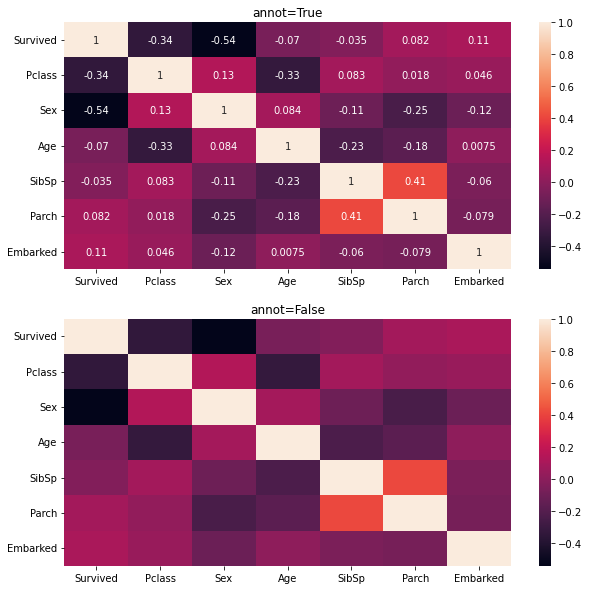

In [7]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
sns.heatmap(train_corr,annot=True,ax=ax1)
sns.heatmap(train_corr,annot=False,ax=ax2) # in case u dont want to display all these numbers in rectangles)
ax1.set_title('annot=True')
ax2.set_title('annot=False')

Text(0.5, 1.0, 'Hot bar ♂ =True')

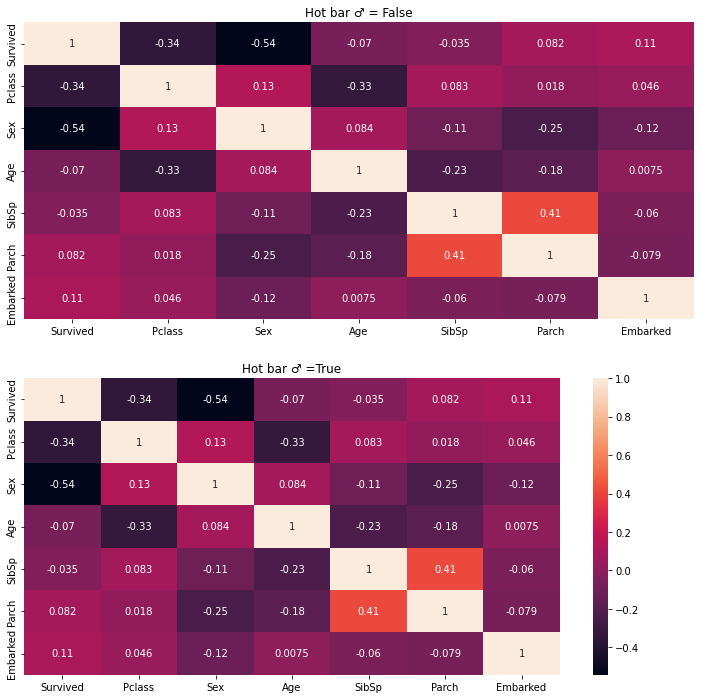

In [8]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(12,12))
sns.heatmap(train_corr,annot=True,ax=ax1,cbar=False)
sns.heatmap(train_corr,annot=True,ax=ax2,cbar=True) #cbar is used if you want to show what heat each color means
ax1.set_title("Hot bar ♂ = False")
ax2.set_title("Hot bar ♂ =True")

Text(0.5, 1.0, 'cmap=Blues')

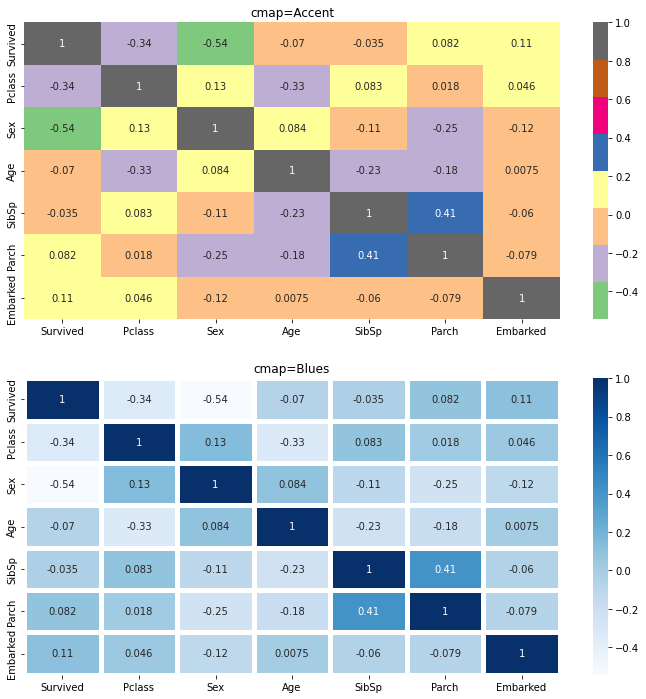

In [9]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(12,12))
sns.heatmap(train_corr,annot=True,ax=ax1,cmap="Accent") # cmap is used if you want to change style
sns.heatmap(train_corr,annot=True,ax=ax2,cmap="Blues", linewidth=5) # linewidth is used to make more space between tiles
ax1.set_title("cmap=Accent")
ax2.set_title("cmap=Blues")

# Boxplot

In [10]:
data = pd.read_csv('../data/titanic.csv')

<AxesSubplot:>

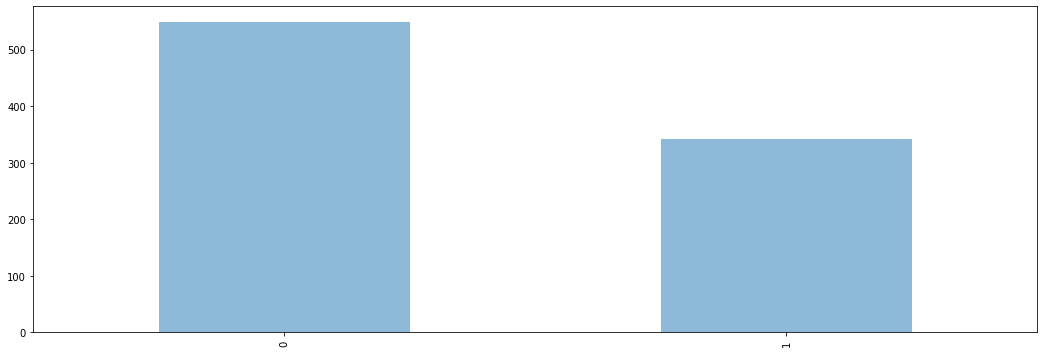

In [11]:
fig = plt.figure(figsize=(18,6)) 
data.Survived.value_counts().plot(kind="bar",alpha=0.5) 

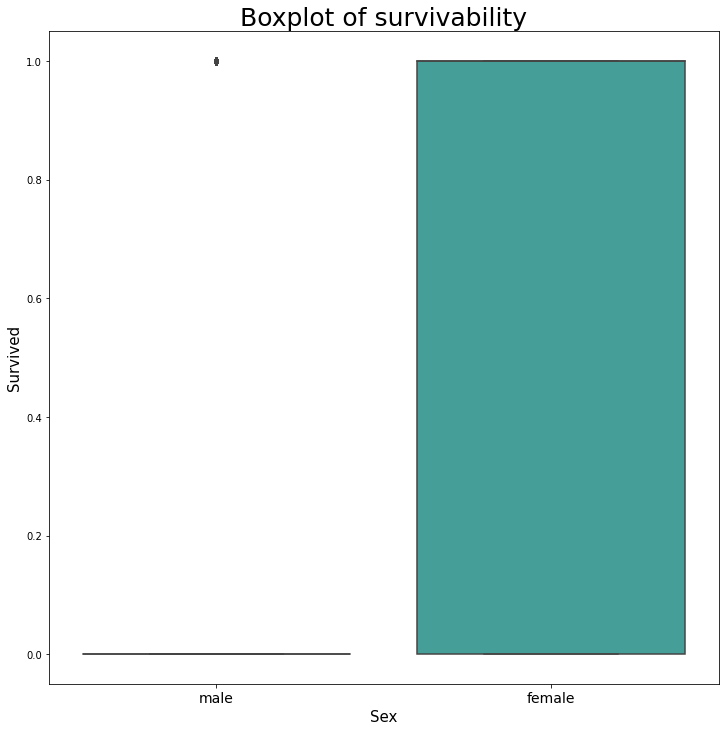

In [12]:
x = data[["Sex", "Survived"]]

f, ax = plt.subplots(figsize=(12, 12));
sns.boxplot(x = "Sex", y = "Survived", data = x, palette = 'husl');

plt.title('Boxplot of survivability', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Sex", fontsize = 15)
plt.ylabel("Survived", fontsize = 15)
plt.savefig("Survive Boxplot.jpg")

/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


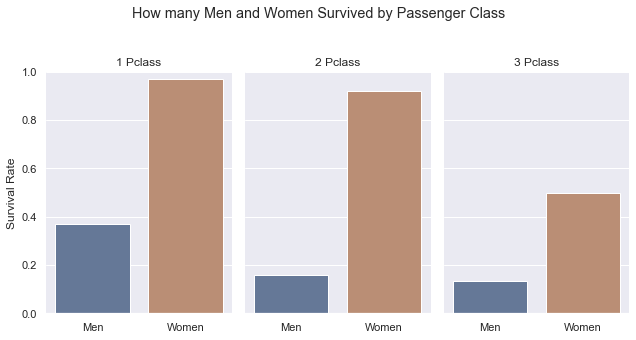

In [13]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=data, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

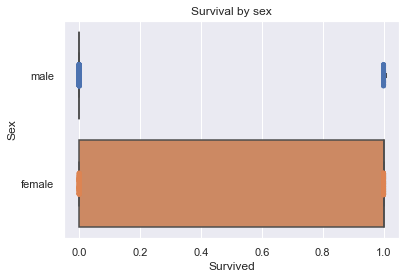

In [14]:
ax = sns.boxplot(x="Survived", y="Sex", 
                data=data)
ax = sns.stripplot(x="Survived", y="Sex",
                   data=data, jitter=True,
                   edgecolor="gray")
plt.title("Survival by sex",fontsize=12);

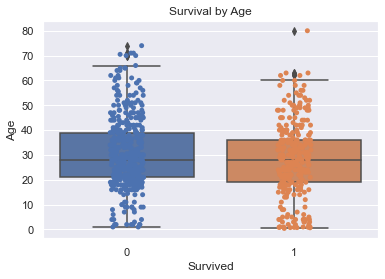

In [15]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=data)
ax = sns.stripplot(x="Survived", y="Age",
                   data=data, jitter=True,
                   edgecolor="gray")
plt.title("Survival by Age",fontsize=12);

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

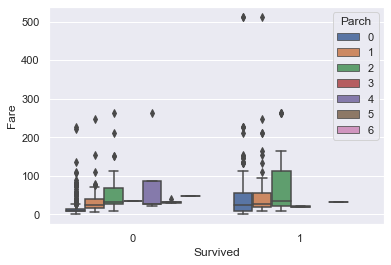

In [16]:
sns.boxplot(x="Survived", y="Fare", hue="Parch", data=data)

# FacetGrid

In [17]:
data = pd.read_csv('../data/titanic.csv')

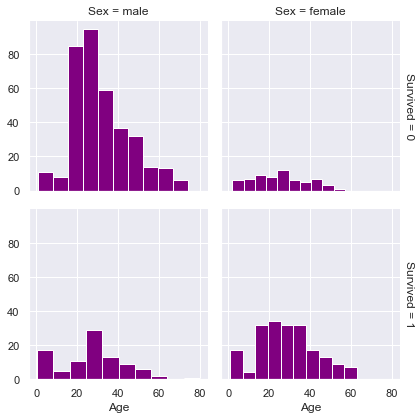

In [18]:
g = sns.FacetGrid(data, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

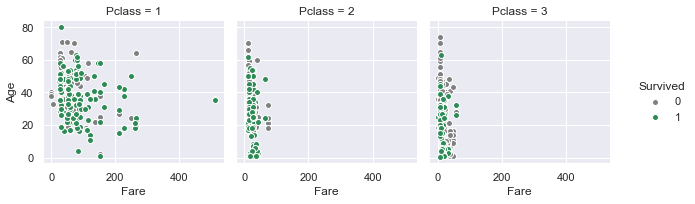

In [19]:
g = sns.FacetGrid(data, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

# Kernal Density estimation OR KDE !

In [20]:
data = pd.read_csv('../data/titanic.csv')

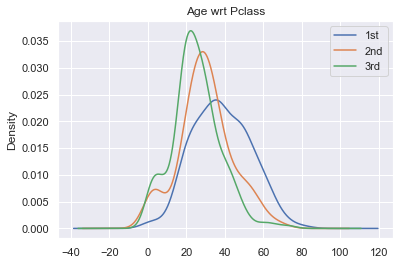

In [21]:
for x in [1,2,3]:    ## for 3 classes
    data.Age[data.Pclass == x].plot(kind="kde")
plt.title("Age wrt Pclass")
plt.legend(("1st","2nd","3rd"))

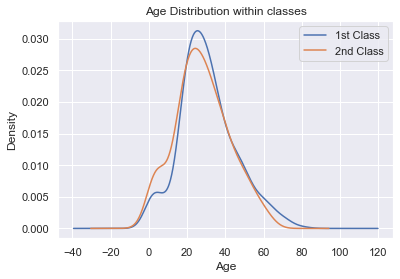

In [22]:
data.Age[data.Sex == "male"].plot(kind='kde')    
data.Age[data.Sex == "female"].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

# Factor Plot

In [23]:
data = pd.read_csv('../data/titanic.csv')

/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


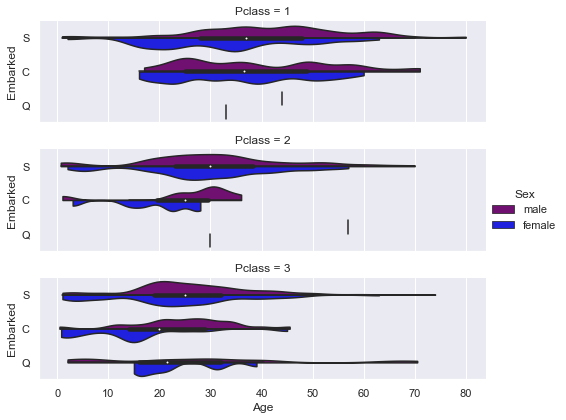

In [24]:
g = sns.factorplot(x="Age", y="Embarked",
                    hue="Sex", row="Pclass",
                    data=data[data.Embarked.notnull()],
                    orient="h", size=2, aspect=3.5, 
                   palette={'male':"purple", 'female':"blue"},
                    kind="violin", split=True, cut=0, bw=.2);

# Using random forest

In [25]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('../data/titanic.csv')

In [26]:
X, y = data.loc[:, data.columns != 'Survived'], data['Survived']
data, X_test, data_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


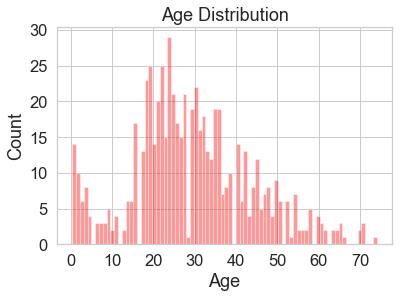

In [27]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="red")
    plt.title("Age Distribution")
    plt.ylabel("Count")

In [28]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [29]:
titanic=fill_missing_age(data)

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


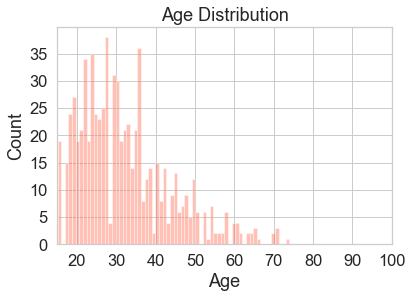

In [30]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100));